In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
df = pd.read_csv(os.path.join('data','heartbeat','F_heart_beat.csv'))

In [4]:
df.head(15)

,age,intenisty level,active,heart beat
0,20,0,0,60-100
1,21,0,0,60-100
2,22,0,0,60-100
3,23,0,0,60-100
4,24,0,0,60-100
5,25,0,0,60-100
6,26,0,0,60-100
7,27,0,0,60-100
8,28,0,0,60-100
9,29,0,0,60-100


In [5]:
df['heart beat'].unique()

array(['60-100', '40-60', '100-170', '95-162', '93-157', '90-153',
       '88-149', '85-145', '83-140', '80-136', '78-132', '75-128'],
      dtype=object)

In [6]:
df['Class']=df['heart beat'].replace({'60-100':1,'40-60':2,'100-170':3,'95-162':4,'93-157':5,'90-153':6,'88-149':7,'85-145':8,'83-140':9,'80-136':10,'78-132':11,'75-128':12})

In [7]:
df.drop_duplicates()

,age,intenisty level,active,heart beat,Class
0,20,0,0,60-100,1
1,21,0,0,60-100,1
2,22,0,0,60-100,1
3,23,0,0,60-100,1
4,24,0,0,60-100,1
...,...,...,...,...,...
239,76,1,1,75-128,12
240,77,1,1,75-128,12
241,78,1,1,75-128,12
242,79,1,1,75-128,12


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              244 non-null    int64 
 1   intenisty level  244 non-null    int64 
 2   active           244 non-null    int64 
 3   heart beat       244 non-null    object
 4   Class            244 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.7+ KB


In [9]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.capitalize()

In [10]:
df1=df[['Age','Intenisty level','Active','Class']]
df1.head(5)

,Age,Intenisty level,Active,Class
0,20,0,0,1
1,21,0,0,1
2,22,0,0,1
3,23,0,0,1
4,24,0,0,1


In [11]:
# Function to detect outliers
def detect_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = dataframe[(dataframe[column] < Q1 - 1.5*IQR) | (dataframe[column] > Q3 + 1.5*IQR)]
    return outliers

# Detect and print number of outliers for each feature
for column in df1.columns:
    

    outliers = detect_outliers(df1, column)
    print(f'Number of outliers in {column}: {len(outliers)}')

Number of outliers in Age: 0
Number of outliers in Intenisty level: 0
Number of outliers in Active: 0
Number of outliers in Class: 0


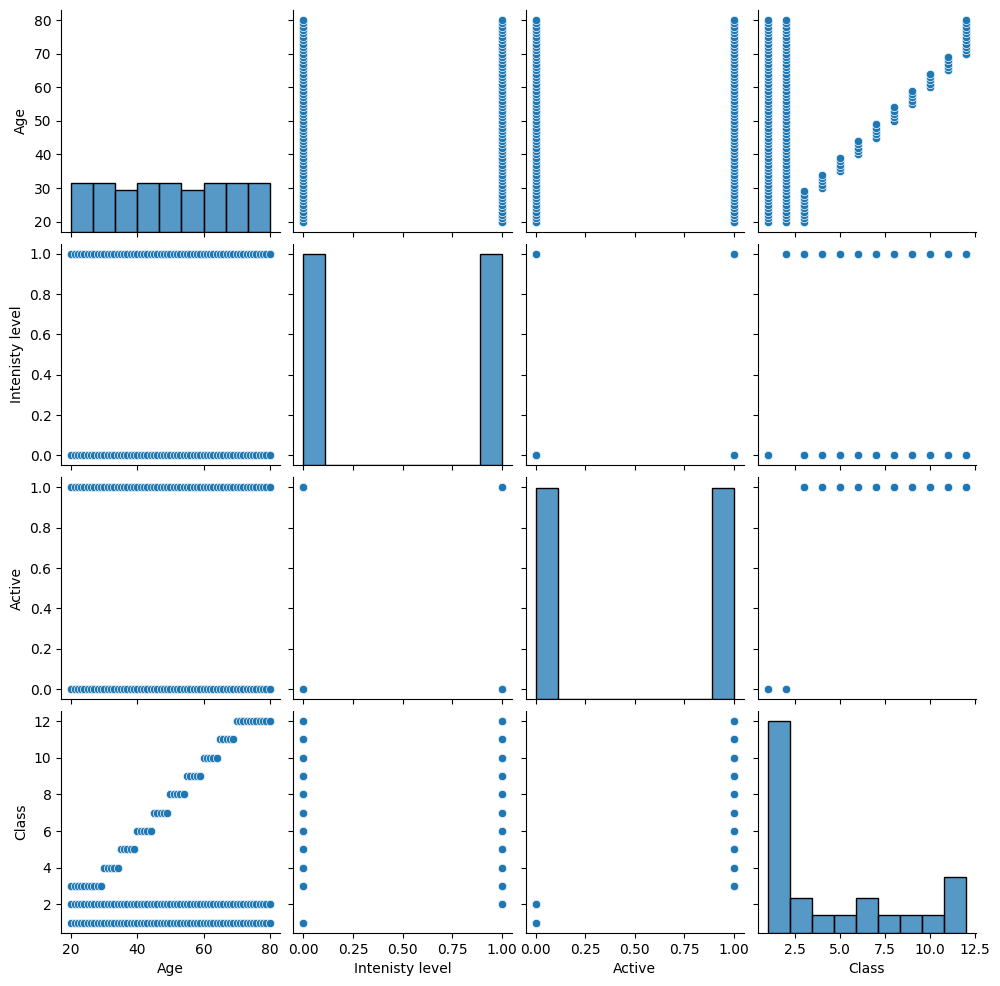

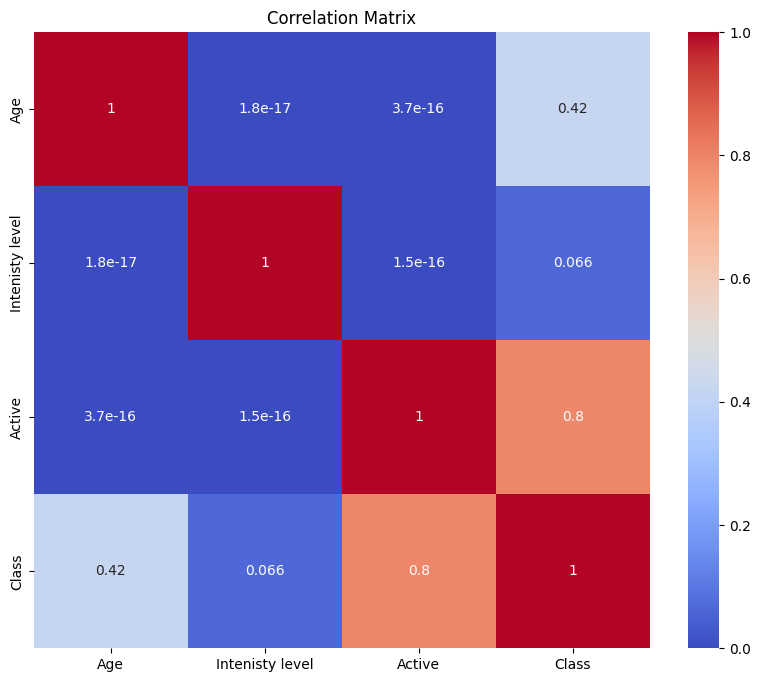

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot scatter matrix to visualize relationships between numerical variables
sns.pairplot(df1)
plt.show()
# Compute the correlation matrix
#correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

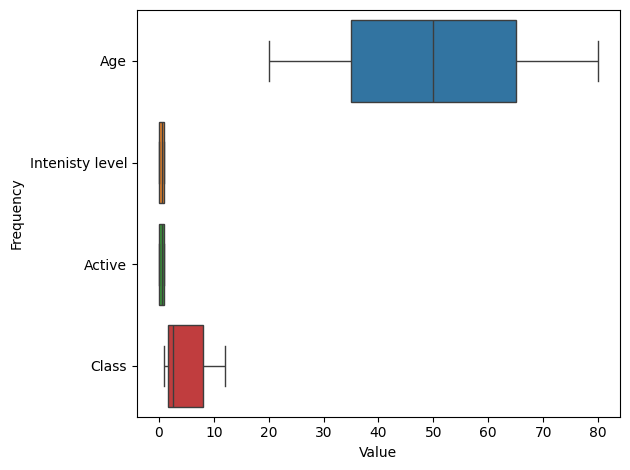

In [13]:
sns.boxplot(data=df1, orient="h")
plt.xlabel("Value")
plt.ylabel("Frequency")
#plt.title("ID")
plt.tight_layout()
plt.show()

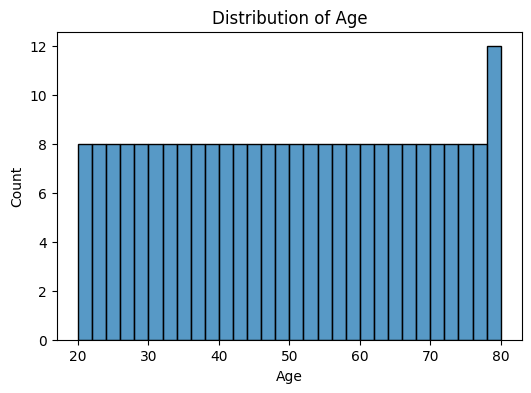

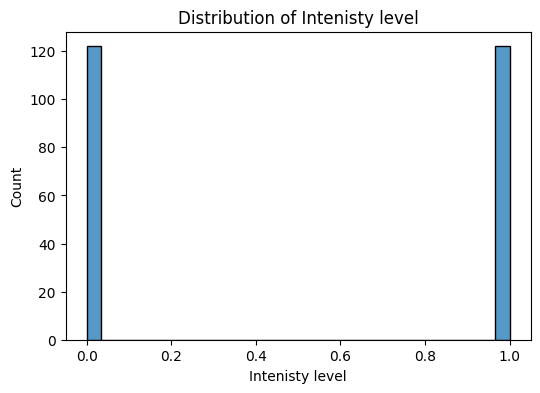

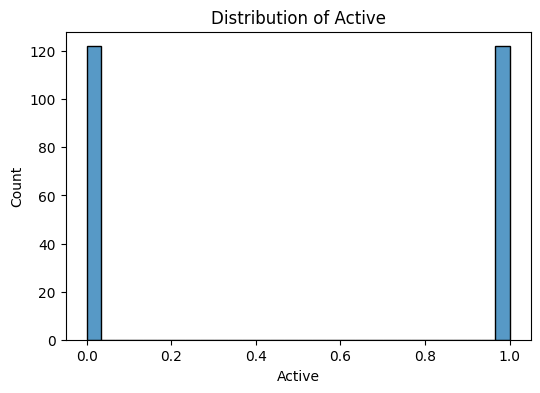

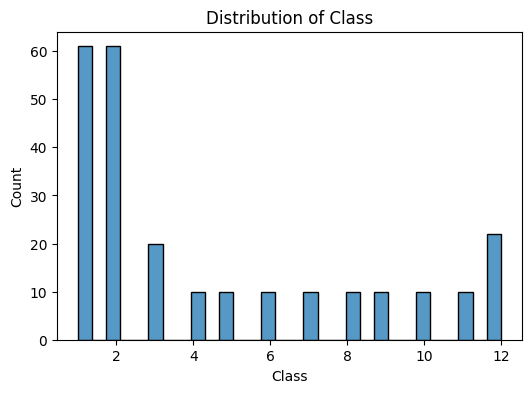

In [14]:
for column in df1.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df1[column], bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

In [15]:
df1.columns = df1.columns.str.strip()


In [16]:
from sklearn.model_selection import train_test_split
x=df[['Age','Intenisty level','Active']]
y=df[['Heart beat']]
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.20,random_state=42)

In [17]:
[col for col in x_train.columns if x_train[col].dtypes!='O']

['Age', 'Intenisty level', 'Active']

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler
ct=ColumnTransformer([
    ('t1',StandardScaler(),['Age','Intenisty level','Active']),
    ('t2', MinMaxScaler(),['Age','Intenisty level','Active'])
],remainder='drop')

In [21]:
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.metrics import accuracy_score
p1=Pipeline([
    ('step1',ct),
    ('model',linear_model.LogisticRegression())
])
p1.fit(x_train,y_train)
pred_y1=p1.predict(x_val)
accuracy_score(y_val,pred_y1)

c:\Users\Is Laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7142857142857143

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
p2=Pipeline([
    ('step1',ct),

    ('model',SVC(C=8))#c->hyperparameter handle overfitings( high value - high mistake-high classification)
])
p2.fit(x_train,y_train)
pred_y2=p2.predict(x_val)
accuracy_score(y_val,pred_y2)

c:\Users\Is Laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9591836734693877

In [23]:
import os
from joblib import dump

# Export the lasso_pipe as a pkl model file
dump(p2, os.path.join('models', 'Heart_Beat.pkl'))

['models\\Heart_Beat.pkl']

In [24]:
from joblib import load
import pandas as pd
import os
loaded_model = load(os.path.join('models', 'Heart_Beat.pkl'))
input_data = pd.DataFrame({'Age': [50], 'Intenisty level': [0], 'Active': [True]})
pred = loaded_model.predict(input_data)
print(pred)

['88-149']
